In [1]:
# Temporal, para agregar las rutas correctas
%run ../../src/ft1D/ruta_temporal.py
if not(src_path in sys.path[0]):
    sys.path.insert(0, os.path.abspath(a_path + src_path)) 

In [2]:
import os, sys
import xmf6
from flow_1D import build_gwf_1D
import xmf6

In [3]:
def flujo_1d(ncol):
    mesh = xmf6.MeshDis(
        nrow = 1,    # Number of rows
        ncol = 120,  # Number of columns
        nlay = 1,    # Number of layers
        row_length = 12.0,    # Length of system ($cm$)
        column_length = 0.1,  # Length of system ($cm$)
        top = 1.0,   # Top of the model ($cm$)
        bottom = 0,  # Layer bottom elevation ($cm$)
    )

    tm_par = dict(
        nper = 1,  # Number of periods
        total_time = 120.0,  # Simulation time ($s$)
        nstp = 1.0,   # Number of time steps
        tsmult = 1.0  # Multiplier for the length of successive time steps.
    )
    
    ml_units = {
        "time": "seconds",
        "length": "centimeters"
    }

    ph_par = dict(
        specific_discharge = 0.1,  # Specific discharge ($cm s^{-1}$)
        hydraulic_conductivity = 0.01,  # Hydraulic conductivity ($cm s^{-1}$)
        source_concentration = 1.0  # Source concentration (unitless)
    )
    
    os_par = dict(
        ws = os.getcwd() + '/output', # Ruta de donde estamos actualmente
        mf6_exe = '/home/jovyan/GMMC/WMA/mf6/bin/mf6', # Ejecutable
        flow_name = 'flow', # Nombre de la simulación
    )
                     
    oc_par = dict(
        head_file = f"{os_par['flow_name']}.hds", 
        fbudget_file = f"{os_par['flow_name']}.bud",            
    )

    sim, gwf = build_gwf_1D(mesh, tm_par, ph_par, ml_units, os_par, oc_par)
    sim.write_simulation(silent=True)
    sim.run_simulation(silent=True)
    xmf6.plot_flow_1D(gwf, mesh, os_par, oc_par)

head_L = 12.899999999999777 	 head_R = 1.0


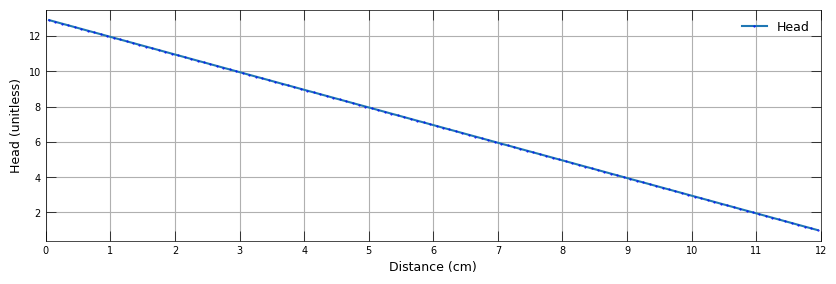

In [4]:
flujo_1d(60)